<a href="https://colab.research.google.com/github/Shyamesh/SIT723-24/blob/main/drl_test_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load CSV data for both clients
client1_data = pd.read_csv("/content/ client1 _bbr_full.csv")
client2_data = pd.read_csv("/content/client2_pcc_switch_bbr.csv")


In [3]:
def preprocess_data(data):
    features = data[['Latency', 'SendingRate', 'LossRate', 'Throughput']].values
    # Normalize the features if necessary
    features = features / np.max(features, axis=0)
    return features

client1_features = preprocess_data(client1_data)
client2_features = preprocess_data(client2_data)


In [4]:
import tensorflow as tf

# Load the pre-trained DRL model
model = tf.keras.models.load_model("dqn_model.h5")


In [5]:
def apply_drl_model(model, features):
    actions = []
    for feature in features:
        feature = np.reshape(feature, [1, feature.shape[0]])
        action = np.argmax(model.predict(feature))
        actions.append(action)
    return actions

client1_actions = apply_drl_model(model, client1_features)
client2_actions = apply_drl_model(model, client2_features)


1/1 [==============================] - 0s 22ms/step


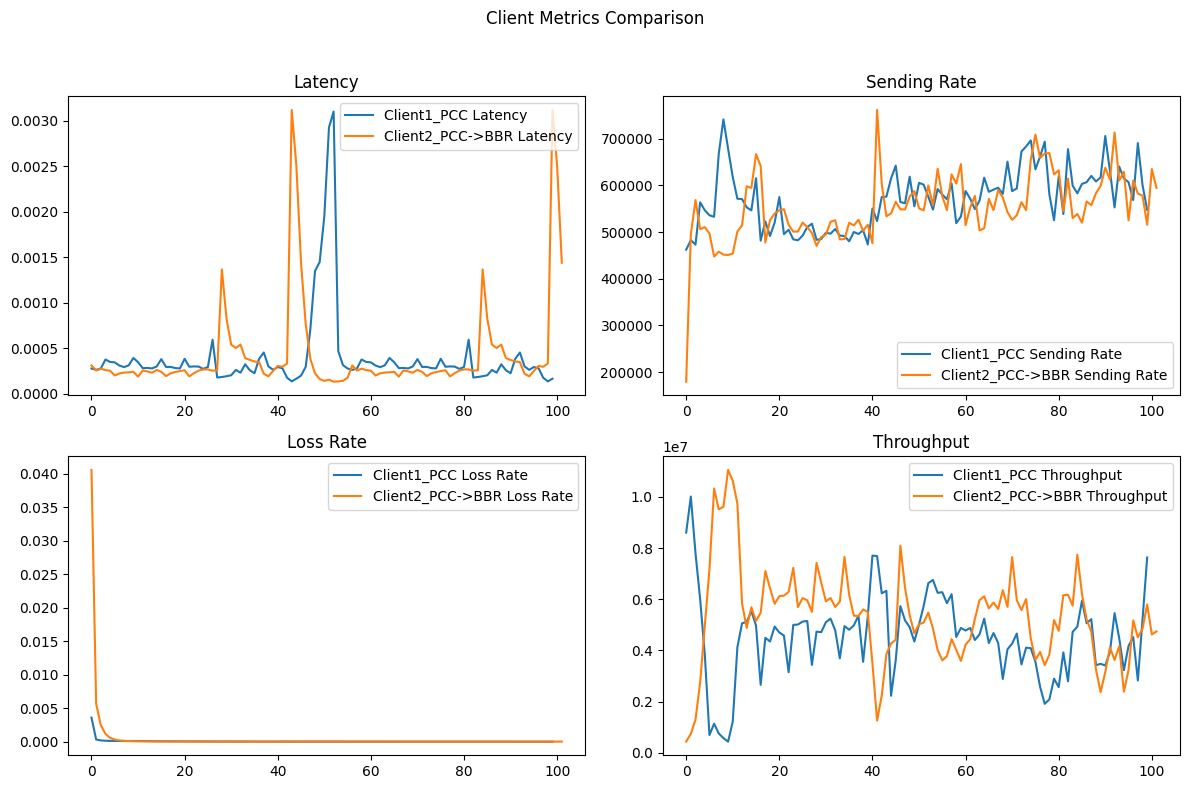

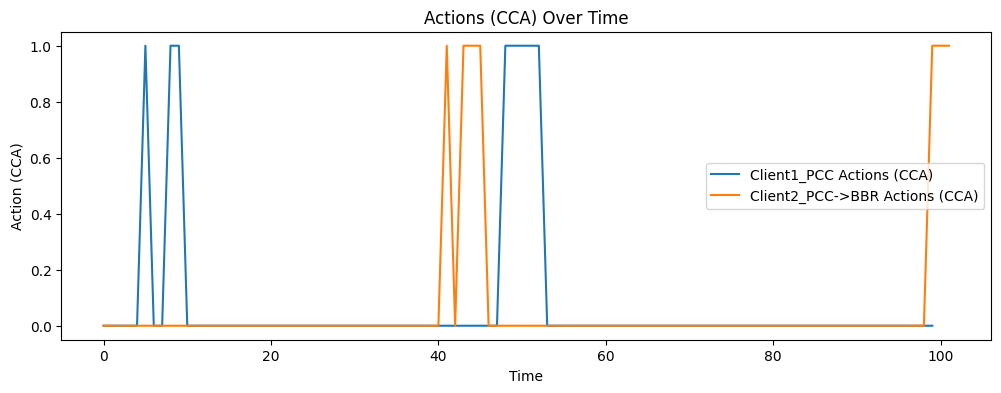

In [13]:
import matplotlib.pyplot as plt

def plot_combined_metrics(client1_data, client2_data, client1_actions, client2_actions):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(client1_data['Latency'], label='Client1_PCC Latency')
    plt.plot(client2_data['Latency'], label='Client2_PCC->BBR Latency')
    plt.title('Latency')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(client1_data['SendingRate'], label='Client1_PCC Sending Rate')
    plt.plot(client2_data['SendingRate'], label='Client2_PCC->BBR Sending Rate')
    plt.title('Sending Rate')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(client1_data['LossRate'], label='Client1_PCC Loss Rate')
    plt.plot(client2_data['LossRate'], label='Client2_PCC->BBR Loss Rate')
    plt.title('Loss Rate')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(client1_data['Throughput'], label='Client1_PCC Throughput')
    plt.plot(client2_data['Throughput'], label='Client2_PCC->BBR Throughput')
    plt.title('Throughput')
    plt.legend()

    plt.suptitle('Client Metrics Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("client_metrics_comparison.png")

    plt.figure(figsize=(12, 4))
    plt.plot(client1_actions, label='Client1_PCC Actions (CCA)')
    plt.plot(client2_actions, label='Client2_PCC->BBR Actions (CCA)')
    plt.xlabel('Time')
    plt.ylabel('Action (CCA)')
    plt.title('Actions (CCA) Over Time')
    plt.legend()")
    plt.show()

plot_combined_metrics(client1_data, client2_data, client1_actions, client2_actions)
